<a href="https://colab.research.google.com/github/yamaguchinorimitsu/ajax_app/blob/master/%E3%82%B9%E3%83%83%E3%82%AD%E3%83%AA%E6%A9%9F%E6%A2%B0%E7%AC%AC%EF%BC%95%E7%AB%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 

df = pd.read_csv('/content/iris.csv')

df.head(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,0.22,0.63,0.08,0.04,Iris-setosa
1,0.17,0.42,0.35,0.04,Iris-setosa
2,0.11,0.50,0.13,0.04,Iris-setosa


In [2]:
df['種類'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [3]:
syurui = df['種類'].unique()

syurui[0]

'Iris-setosa'

In [4]:
df['種類'].value_counts()


Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 種類, dtype: int64

In [5]:
df.tail(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,NaN,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [6]:
df.isnull()#各マスが欠損値かどうか調べる

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,True,False,False
148,False,False,False,False,False


In [7]:
df.isnull().any(axis=0)

がく片長さ     True
がく片幅      True
花弁長さ      True
花弁幅       True
種類       False
dtype: bool

In [8]:
df.sum() # 各列の合計値を計算

がく片長さ                                                62.29
がく片幅                                                 65.62
花弁長さ                                                 72.04
花弁幅                                                  66.22
種類       Iris-setosaIris-setosaIris-setosaIris-setosaIr...
dtype: object

In [9]:
# 各列に欠損値がいくつあるか集計
tmp = df.isnull()
tmp.sum()

がく片長さ    2
がく片幅     1
花弁長さ     2
花弁幅      2
種類       0
dtype: int64

In [10]:
df.isnull().sum()

がく片長さ    2
がく片幅     1
花弁長さ     2
花弁幅      2
種類       0
dtype: int64

In [11]:
df2 = df.dropna(how = 'any',axis=0)

df2.tail(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
146,0.56,0.21,0.69,0.46,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [20]:
df['花弁長さ'] = df['花弁長さ'].fillna(0)
df.tail(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,0.00,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [22]:
df['花弁長さ'] = df['花弁長さ'].fillna(0)
df.tail(3)

,がく片長さ,がく片幅,花弁長さ,花弁幅,種類
147,0.61,0.42,0.00,0.79,Iris-virginica
148,0.53,0.58,0.63,0.92,Iris-virginica
149,0.44,0.42,0.41,0.71,Iris-virginica


In [12]:
df.mean()

<ipython-input-12-c61f0c8f89b5>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean()


がく片長さ    0.420878
がく片幅     0.440403
花弁長さ     0.486757
花弁幅      0.447432
dtype: float64

In [13]:
#がく片長さ列の平均値を計算
df['がく片長さ'].mean()

0.42087837837837844

In [14]:
from tables.table import Column

df = pd.read_csv('/content/iris.csv')

column = df.mean()

df2 = df.fillna(column)

df2.isnull().any(axis=0)

<ipython-input-14-55bde04803ff>:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  column = df.mean()


がく片長さ    False
がく片幅     False
花弁長さ     False
花弁幅      False
種類       False
dtype: bool

In [15]:
xcol = ['がく片長さ','がく片幅','花弁長さ','花弁幅']

x = df2[xcol]
t = df2['種類']

In [16]:
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=2,random_state=0)


In [17]:
model.fit(x, t) # モデルの学習
model.score(x, t) # 学習済みモデルの正解率計算

0.94

In [20]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test, = train_test_split(x,t,test_size=0.3,random_state=0)

print(x_train.shape)

print(x_test.shape)



(105, 4)
(45, 4)


In [21]:
model.fit(x_train,y_train)

model.score(x_test,y_test)

0.9555555555555556

In [22]:
import pickle
with open('irismodel.pkl', 'wb') as f:
    pickle.dump(model, f)

In [23]:
model.tree_.feature

array([ 3, -2,  3, -2, -2], dtype=int64)

In [24]:
model.tree_.threshold

array([ 0.275, -2.   ,  0.69 , -2.   , -2.   ])

In [26]:
print(model.tree_.value[1])
print(model.tree_.value[3])
print(model.tree_.value[4])


[[34.  0.  0.]]
[[ 0. 31.  6.]]
[[ 0.  1. 33.]]


In [27]:
model.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

[Text(0.4, 0.8333333333333334, 'kaben_haba <= 0.275\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.6, 0.5, 'kaben_haba <= 0.69\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.272\nsamples = 37\nvalue = [0, 31, 6]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.057\nsamples = 34\nvalue = [0, 1, 33]')]

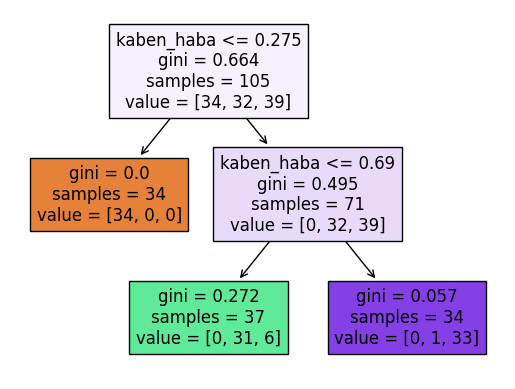

In [28]:
# 描画関数の仕様上、和名の特徴量を英字に直す
x_train.columns = ['gaku_nagasa', 'gaku_haba',
'kaben_nagasa','kaben_haba']
# 描画関数の利用
from sklearn.tree import plot_tree
# plot_tree関数で決定木を描画
plot_tree(model, feature_names = x_train.columns,
filled = True)